## Library Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Data Reading

In [11]:
df = pd.read_csv('IoT Network Intrusion Dataset.csv')

In [12]:
df.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,...,0.0,0.0,0.0,78.50,6.363961,83.0,74.0,Anomaly,Mirai,Mirai-Hostbruteforceg
6,192.168.0.24-210.89.164.90-60175-8899-17,192.168.0.24,60175,210.89.164.90,8899,17,25/07/2019 03:21:01 AM,139,20,1,...,0.0,0.0,0.0,6.95,1.669384,10.0,4.0,Anomaly,Mirai,Mirai-UDP Flooding
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,...,0.0,0.0,0.0,112.00,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
8,192.168.0.13-210.89.164.90-60132-8899-17,192.168.0.13,60132,210.89.164.90,8899,17,25/07/2019 03:21:13 AM,86,1,1,...,0.0,0.0,0.0,86.00,0.000000,86.0,86.0,Anomaly,Mirai,Mirai-UDP Flooding
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.0,0.0,0.0,6799.00,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding


## Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

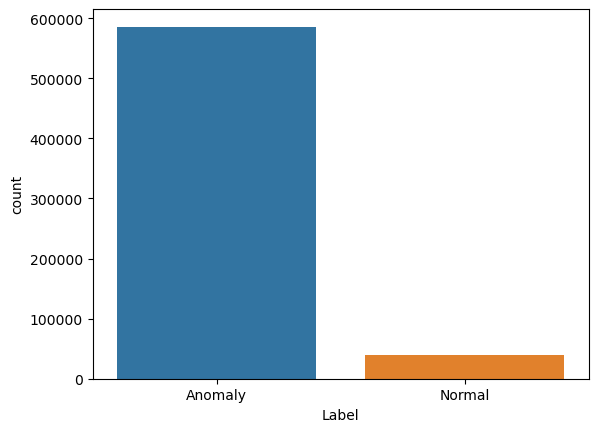

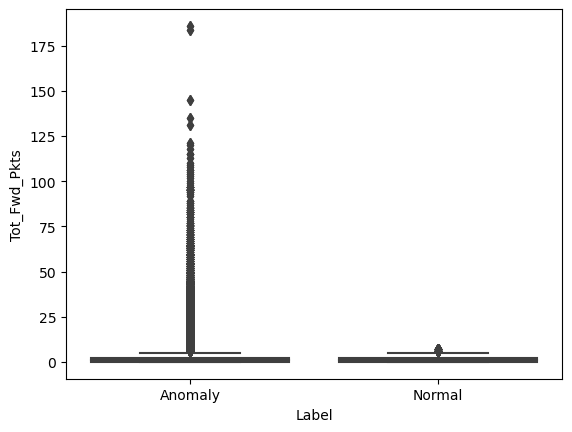

In [14]:
sns.countplot(x='Label', data=df)
plt.show()

sns.boxplot(x='Label', y='Tot_Fwd_Pkts', data=df)
plt.show()


In [15]:
df.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


In [16]:
# Identify missing values
df.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [17]:
# Check the shape of the dataset
print(df.shape)

(625783, 86)


In [18]:
# Check the data types of each column
print(df.dtypes)

Flow_ID      object
Src_IP       object
Src_Port      int64
Dst_IP       object
Dst_Port      int64
             ...   
Idle_Max    float64
Idle_Min    float64
Label        object
Cat          object
Sub_Cat      object
Length: 86, dtype: object


In [19]:
# Check the number of unique values in each column
print(df.nunique())

Flow_ID     64064
Src_IP      57985
Src_Port    11205
Dst_IP        478
Dst_Port     1034
            ...  
Idle_Max    11956
Idle_Min    10872
Label           2
Cat             5
Sub_Cat         9
Length: 86, dtype: int64


In [20]:
# Check for any missing values in the dataset
print(df.isnull().sum())

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64


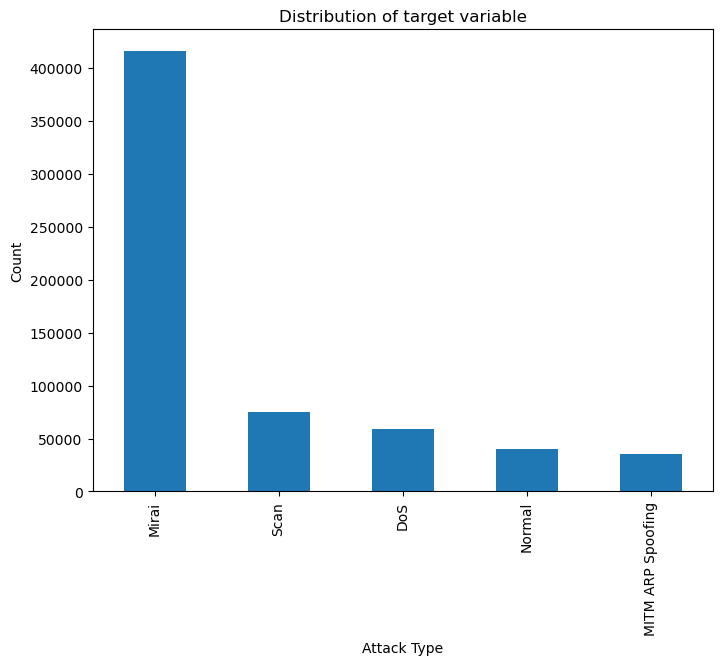

In [21]:
# Visualizing the target variable
plt.figure(figsize=(8,6))
df['Cat'].value_counts().plot(kind='bar')
plt.title('Distribution of target variable')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

## Pre-processing

In [22]:
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Protocol'])
X = df.drop(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Timestamp', 'Label', 'Cat', 'Sub_Cat'], axis=1)
y = df['Label']

In [23]:
print(np.isnan(X).sum())

Flow_Duration      0
Tot_Fwd_Pkts       0
Tot_Bwd_Pkts       0
TotLen_Fwd_Pkts    0
TotLen_Bwd_Pkts    0
                  ..
Idle_Max           0
Idle_Min           0
Protocol_0         0
Protocol_6         0
Protocol_17        0
Length: 79, dtype: int64


In [24]:
print(np.isinf(X).sum())

Flow_Duration      0
Tot_Fwd_Pkts       0
Tot_Bwd_Pkts       0
TotLen_Fwd_Pkts    0
TotLen_Bwd_Pkts    0
                  ..
Idle_Max           0
Idle_Min           0
Protocol_0         0
Protocol_6         0
Protocol_17        0
Length: 79, dtype: int64


In [25]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## Modeling and Evaluation

In [27]:
# ML-based classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [29]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [32]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

In [33]:
# Performance evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9898101046688151
[[175388    352]
 [  1561  10434]]
Classification Report:
               precision    recall  f1-score   support

     Anomaly       0.99      1.00      0.99    175740
      Normal       0.97      0.87      0.92     11995

    accuracy                           0.99    187735
   macro avg       0.98      0.93      0.96    187735
weighted avg       0.99      0.99      0.99    187735



In [34]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.989740858124484
[[175422    318]
 [  1608  10387]]
Classification Report:
               precision    recall  f1-score   support

     Anomaly       0.99      1.00      0.99    175740
      Normal       0.97      0.87      0.92     11995

    accuracy                           0.99    187735
   macro avg       0.98      0.93      0.95    187735
weighted avg       0.99      0.99      0.99    187735



In [35]:
# Evaluate the model's performance
print("K-NN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n:", classification_report(y_test, y_pred))

K-NN Accuracy: 0.9876794417663195
Classification Report
:               precision    recall  f1-score   support

     Anomaly       0.99      1.00      0.99    175740
      Normal       0.94      0.87      0.90     11995

    accuracy                           0.99    187735
   macro avg       0.96      0.93      0.95    187735
weighted avg       0.99      0.99      0.99    187735



In [36]:
# logistic regression model
lr = LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)
# predict on the test data
y_pred = lr.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\kamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print('Logistic Regression Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)

Logistic Regression Accuracy: 0.9730844008842251
Confusion Matrix:
 [[175083    657]
 [  4396   7599]]
Classification Report:
               precision    recall  f1-score   support

     Anomaly       0.98      1.00      0.99    175740
      Normal       0.92      0.63      0.75     11995

    accuracy                           0.97    187735
   macro avg       0.95      0.81      0.87    187735
weighted avg       0.97      0.97      0.97    187735



In [38]:
# Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

report = classification_report(y_test, y_pred)

In [39]:
print('Naive Bayes Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)

Naive Bayes Accuracy: 0.9730844008842251
Confusion Matrix:
 [[175083    657]
 [  4396   7599]]
Classification Report:
               precision    recall  f1-score   support

     Anomaly       1.00      0.50      0.67    175740
      Normal       0.12      1.00      0.21     11995

    accuracy                           0.53    187735
   macro avg       0.56      0.75      0.44    187735
weighted avg       0.94      0.53      0.64    187735



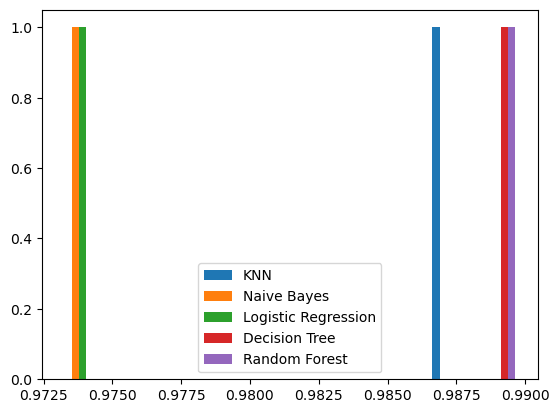

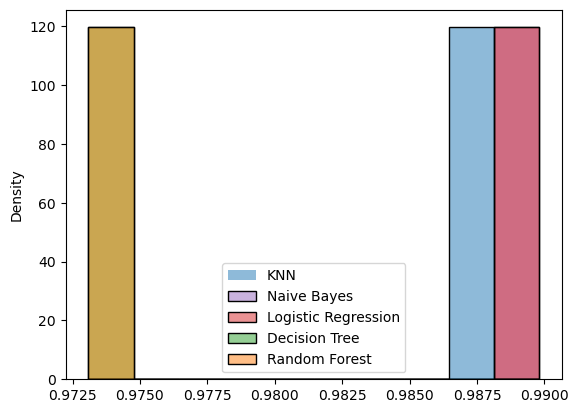

In [40]:
knn_results = [0.9876581351372946]
nb_results = [0.9730897275414814]
lr_results = [0.9730897275414814]
dt_results = [0.9898101046688151]
rf_results = [0.989740858124484]

plt.hist([knn_results, nb_results, lr_results, dt_results, rf_results], bins=10, label=['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
plt.legend()
plt.show()

sns.histplot(data=[knn_results, nb_results, lr_results, dt_results, rf_results], bins=10, kde=True, alpha=0.5, stat='density')
plt.legend(['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'])
plt.show()

The best model for the project is the Decision Tree, as it has the highest accuracy score of 0.98981.